## Robot Learning

## Assignment 5

#### Group names: Edit this cell and write your names here

### Task 19

In the programming task on last weeks assignment sheet you obtained state values for a given policy using either Monte Carlo or TD policy evaluation. Suppose you would like to create a policy which is greedy w.r.t. these state values. How would you proceed? Are there any further terms that you would require? 

<div style="text-align: right; font-weight:bold"> 4 Points </div>

Please answer here.

### Task 20

Please regard the following pseudocode for the Sarsa($\lambda$) algorithm, taken from the html version of the first edition of "Reinforcement Learning: An Introduction" by Barto and Sutton.

<img src="helpers/sarsa_lambda_wrong.PNG" alt="Sarsa Lambda" title="Sarsa Lambda" width="650"/>

Note that the eligibility traces $e(s,a)$ are not reset to zero after each episode. Explain why this is an error in the pseudocode and a reset of the eligibility after each episode is indeed necessary.

<div style="text-align: right; font-weight:bold"> 4 Points </div>



That the eligibility traces $e(s,a)$ are not reset to zero after each episode is an error in the pseudocode because: \
In the Sarsa($\lambda$) algorithm we want to reward the states which we visited in the episode. The eligibility traces $e(s,a)$ save the state-action pairs.$ \ $
If we don't reset the values at the beginning of each episode, its an error because we still have the action done from the previous episode. That's a problem because the action done in the new episode could reward actions from the previous episode. \
A reset of the eligibility after each episode is necessary because then we do not have the problem described earlier. A reset is necessary because otherwise an action in the new episode could affect previous episodes.



Also we want all episodes to contribute equally while finding the optimal Q values. If e was not reset to 0, since e's keep getting scaled down by a factor of gamma*lambda we get that the contribution of later episodes to the Q values will be smaller than that of the earlier epsiodes. 





### Task 21

Recall the following $18 \times 14$ grid world, which represents a section of a racetrack with a sharp right turn after a lane narrow.

<img src="helpers/racetrack.png" alt="Grid World" title="Grid World" width="650"/>

The agent enters the section on one of the blue cells at the bottom. Its initial velocity is one cell per time step into the upward direction.

Actions are to increase or decrease its velocity components by one or to leave it unchanged. To clarify, the actions are not to set a velocity, but to accelerate or decelerate. The velocity is thus part of the agent's state, the available actions are accelerations within the physical limitations of the vehicle that the agent is driving.

Both velocity components are restricted to be nonnegative and their sum must be at least 1 and cannot exceed 5. This constrains the available actions based on the agent's current velocity.

The rewards are −1 for each step that the agent stays on the track, which is colored green. The reward is −10 if the agent drives into the crash barriers marked in red. 

The episode ends when the agent crashes or when it succesfully exits the section by driving onto the blue line at the top-right of the grid.

You are given some information for this environment. Please find it in the data structures below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

racetrack = -10. * np.ones((18,14))

circuit =   [(1,x) for x in np.arange(5,13)] + \
            [(2,x) for x in np.arange(4,13)] + \
            [(3,x) for x in np.arange(3,13)] + \
            [(4,x) for x in np.arange(3,13)] + \
            [(5,x) for x in np.arange(3,13)] + \
            [(6,x) for x in np.arange(3,11)] + \
            [(7,x) for x in np.arange(3,9)] + \
            [(8,x) for x in np.arange(3,8)] + \
            [(9,x) for x in np.arange(3,8)] + \
            [(10,x) for x in np.arange(3,8)] + \
            [(11,x) for x in np.arange(4,8)] + \
            [(12,x) for x in np.arange(4,8)] + \
            [(13,x) for x in np.arange(4,7)] + \
            [(14,x) for x in np.arange(4,7)] + \
            [(15,x) for x in np.arange(2,7)] + \
            [(16,x) for x in np.arange(2,7)]
            

for cell in circuit:
    racetrack[cell] = -1.

finishLine = [(y,13) for y in np.arange(1,6)]

for cell in finishLine:
    racetrack[cell] = 0.

startingGrid = [(17,x) for x in np.arange(2,7)]

for cell in startingGrid:
    racetrack[cell] = -1.

Also, please familiarize yourself with the provided racetrack environment class and helper functions by examining the example episode below, which is played by an agent that makes random decisions at each time step.

[0 4 5 6 7]
[0 4 5 6 7 8]


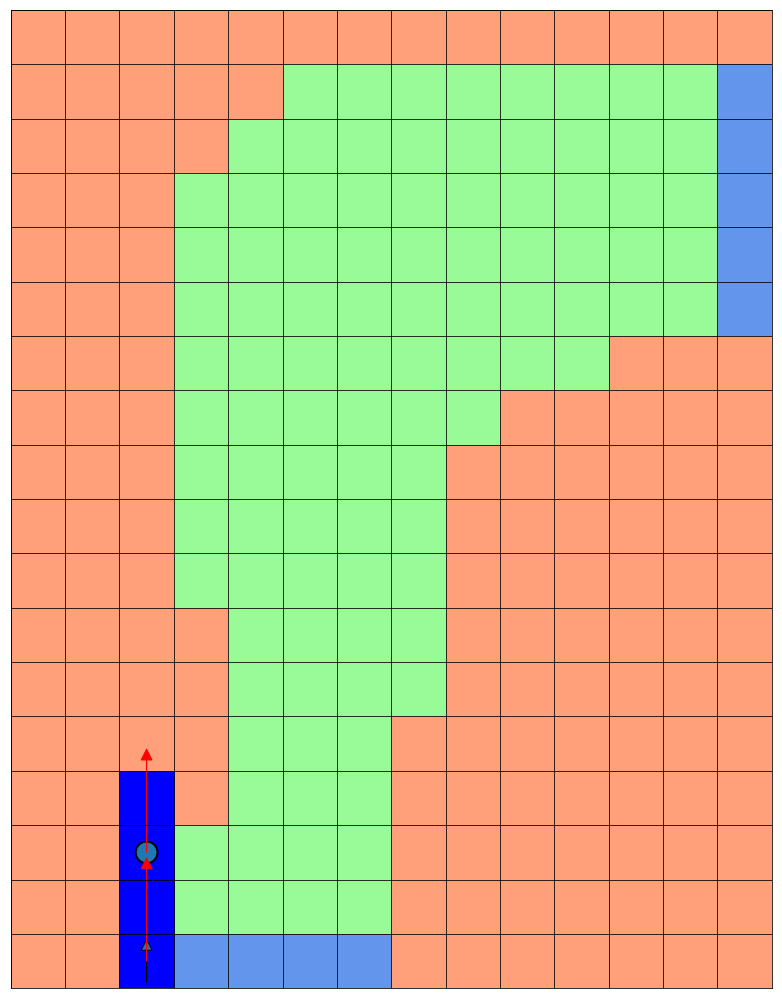

In [2]:
# get the required helper class and visualization function
from utils import env, drawTrajectory

# this makes sure that our description of the episode visualization makes sense
#np.random.seed(321)

# create a racing environment
racer = env()
# reset the agent to one of the 4 starting cells at random
# do this before each new episode
racer.reset()
# you can also manually set the agent position if you want to examine its behaviour there
racer.setPosition(17,2)
# create flag tracking whether the episode is over
done = False

# create lists to save the trajectory and the decisions of the agent
actions = []
moves = []
velocities = []

# these methods do what you would expect
# v is an integer in [0, 35] representing a velocity
# y, x are both integers, together, they represent the agents location
v = racer.getVelocity()
y, x = racer.getPosition()

# simulate until the episode is over
while not done:
    # which actions are possible at the current velocity?
    # the actions are integers in [0,8]
    possibleActions = racer.getAvailableActions()
    # select one of them randomly
    a = np.random.choice(possibleActions)
    print(possibleActions)
    # save the action
    actions.append(a)
    # execute the action using the step function
    # y, x, v are new positions and velocities
    # done is the flag whether the episode is over
    # travel details exactly which cells the agent traveled through
    y, x, v, r, done, travel = racer.step(action = a)
    # save the velocities
    velocities.append(v)
    # save the cells that the agent most recently passed through
    # they are only needed for visualization
    moves.append(travel)

# use the helper function to display how the episode went
drawTrajectory(moves, actions, velocities)

As an output to the cell above, you get a visualization of the agent's path through the race track section. You can see several cells marked in dark blue. These are the grid cells that the agent passed through. Between two time steps, they are calculated by a line drawing algorithm given the current position and velocity of the agent, as well as the acceleration it selected. This acceleration is represented by the arrows with the blue tips. In some cases, a cell will instead contain a circle. This represents the action of no acceleration or deceleration at all, which means that the velocity stays the same as in the previous time step. The red arrows show the velocity of the agent at a certain step after the acceleration the agent selected is added to it. For example, at the very start, the agent has the initial velocity of one cell per step towards the top of the grid. However, it chooses to decelerate in y direction and accelerate towards the right. Thus, the resulting velocity, represented by the first red arrow, points towards the right. Unfortunately, the agent in this episode did not slow down on time and the episode ends in a crash into the barriers at the top of the grid.

#### Now to the task: 

Compute an optimal policy  $\pi^*(s,a)$  for an agent on the racetrack (obstacle cells do not matter) using either Sarsa *or* Q-Learning (your choice!). Make sure to only use admissible actions at each timestep (*env.getAvailableActions()*). To verify your algorithm, show one trajectory beginning in each of the 5 starting positions. For this purpose you can use *env.setPosition(y,x)* at the beginning of an episode. Depending on your algorithm, decide whether you want to deactivate exploratory actions before presenting your agent's behaviour. Please also report the cumulative moving average episode return during training in a plot. 


<div style="text-align: right; font-weight:bold"> 8 Points </div>

In [3]:
def epsilonGreedy(Q,y,x,v,possibleActions,epsilon):
    #Chooses random action with probability epsilon
    if np.random.rand(1) < epsilon:
        a = np.random.choice(possibleActions)
    else:
        #Pick an action randomly from the set of all possible optimal actions
        optimalQvalue = np.max(Q[y,x,v,possibleActions])
        optimalActions = possibleActions[np.where(Q[y,x,v,possibleActions] == optimalQvalue)[0]]
        a = np.random.choice(optimalActions)
        
        #a = possibleActions[np.argmax(Q[y,x,v,possibleActions])]
        
    return a
    


In [4]:
#Hyperparameters
#These were determined after some experimentation 
noEpisodes = 20000
gamma = 0.9 #represents how much future rewards matters wrt to current rewards
epsilon = 0.3 #exploration vs exploitation
alpha = 0.2 #Weightage for new rewards vs old rewards



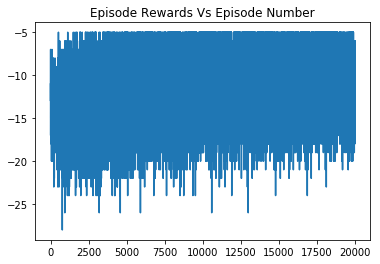

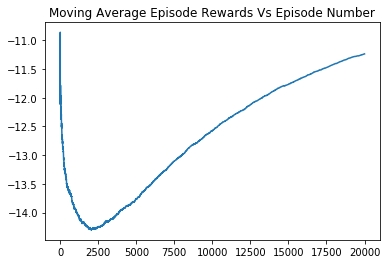

In [5]:
# Your solution goes here.
#SARSA Learning - Training
# get the required helper class and visualization function
from utils import env, drawTrajectory

# this makes sure that our description of the episode visualization makes sense
#np.random.seed(321)


#Initialize Q
Q = np.zeros(shape = (18,14,36,9)) #indices represent Q[y,x,velocity,action]
 

episodeRewards = [] #Store rewards of each episode
averageRewards = [0] #store avg reward obtained uptil that episode


for episode in range(noEpisodes):
    #print(f'Episode No {episode}')
    
    # create a racing environment
    racer = env()
    # reset the agent to one of the 4 starting cells at random
    # do this before each new episode
    racer.reset()
    # you can also manually set the agent position if you want to examine its behaviour there
    #racer.setPosition(17,6)
    # create flag tracking whether the episode is over
    done = False

    # create lists to save the trajectory and the decisions of the agent
    actions = []
    moves = []
    velocities = []
    episodeReward = 0

    # these methods do what you would expect
    # v is an integer in [0, 35] representing a velocity
    # y, x are both integers, together, they represent the agents location
    v = racer.getVelocity()
    y, x = racer.getPosition()
    
    # which actions are possible at the current velocity?
    # the actions are integers in [0,8]
    
    possibleActions = racer.getAvailableActions()
    
    #Choose action in epsilon greedy manner
    a = epsilonGreedy(Q,y,x,v,possibleActions,epsilon)
    step = 0
    
    # simulate until the episode is over
    while not done:
        step+=1
        #print(f'Step No {step}')
        # save the action
        actions.append(a)
        # execute the action using the step function
        # y, x, v are new positions and velocities
        # done is the flag whether the episode is over
        # travel details exactly which cells the agent traveled through
        y_prime, x_prime, v_prime, r, done, travel = racer.step(action = a)
        
        possibleActions = racer.getAvailableActions() 
        a_prime = epsilonGreedy(Q,y_prime,x_prime,v_prime,possibleActions,epsilon)
        
        Q[y,x,v,a] += alpha * (r + gamma*Q[y_prime,x_prime,v_prime,a_prime] - Q[y,x,v,a]) #SARSA update
        
        episodeReward += r
        
        y, x, v = y_prime, x_prime, v_prime
        a = a_prime
        
        # save the velocities
        velocities.append(v)
        # save the cells that the agent most recently passed through
        # they are only needed for visualization
        moves.append(travel)

    episodeRewards.append(episodeReward)
    #Moving avg formula is new_mean = old_mean(1-1/n) + new_value/n 
    #where n is new length 
    averageRewards.append(averageRewards[-1] + (episodeReward-averageRewards[-1])/(episode+1)) 

plt.title("Episode Rewards Vs Episode Number")
plt.plot(range(noEpisodes),episodeRewards)
plt.show()

plt.title("Moving Average Episode Rewards Vs Episode Number")
plt.plot(range(noEpisodes),averageRewards[1:])
plt.show()


X Start is 2


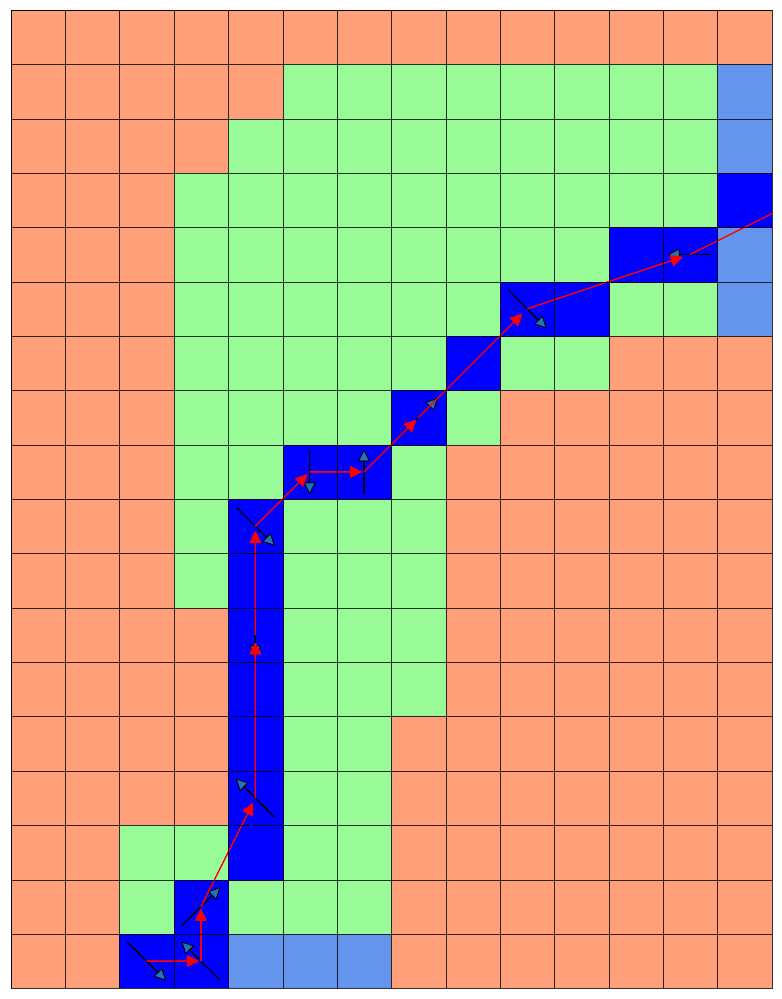

X Start is 3


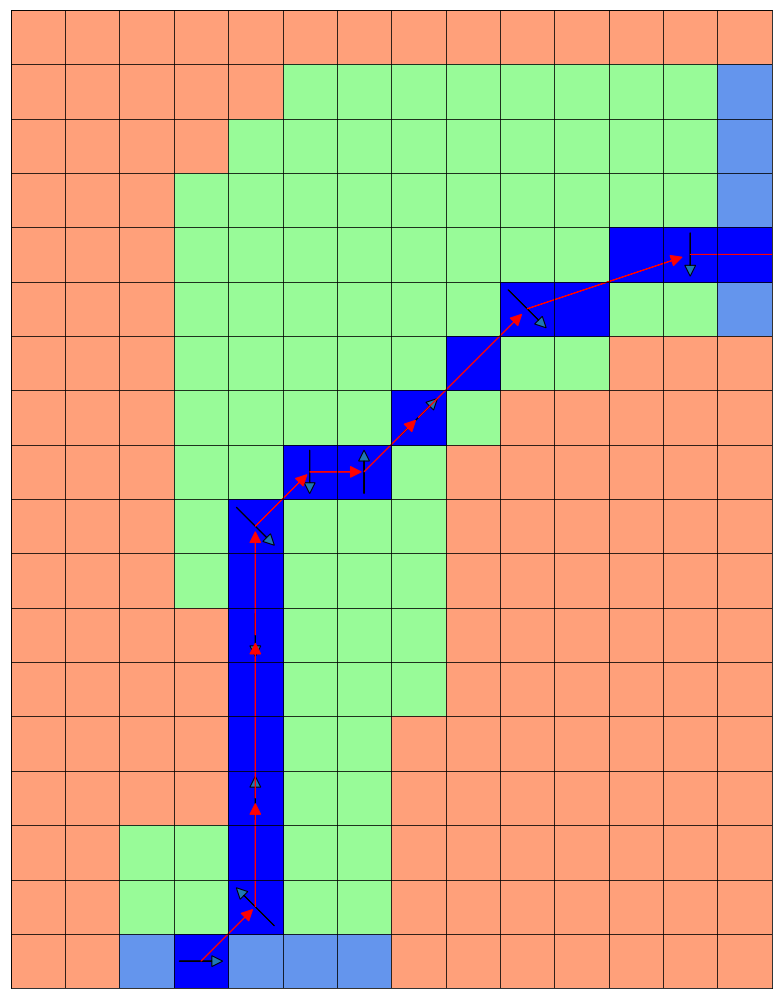

X Start is 4


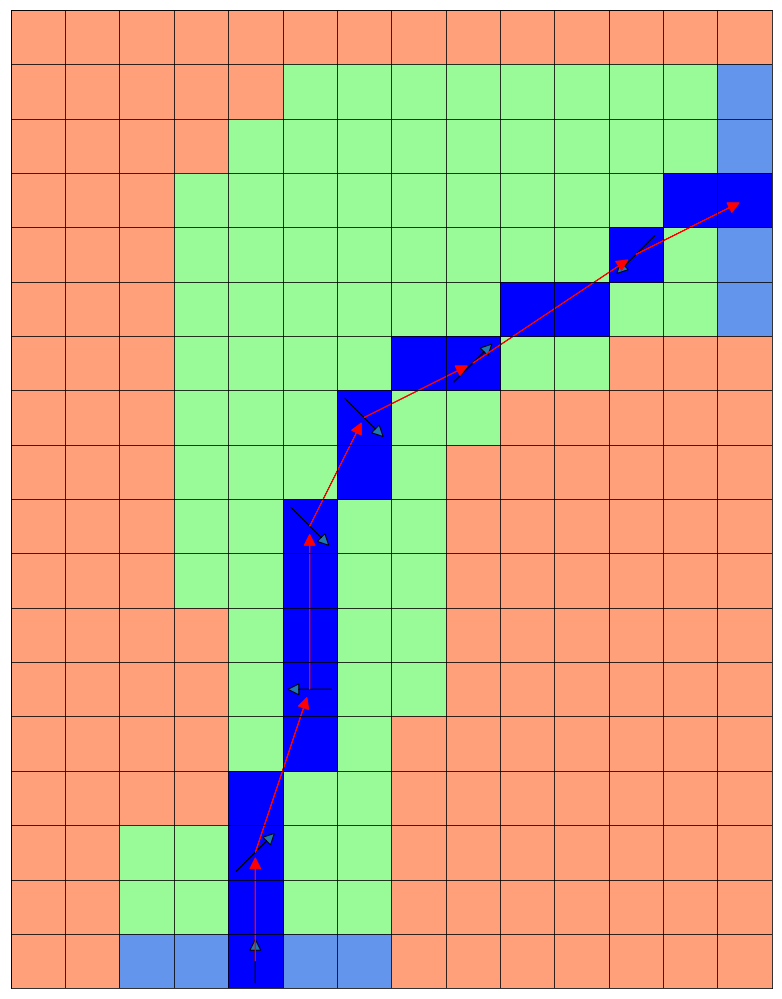

X Start is 5


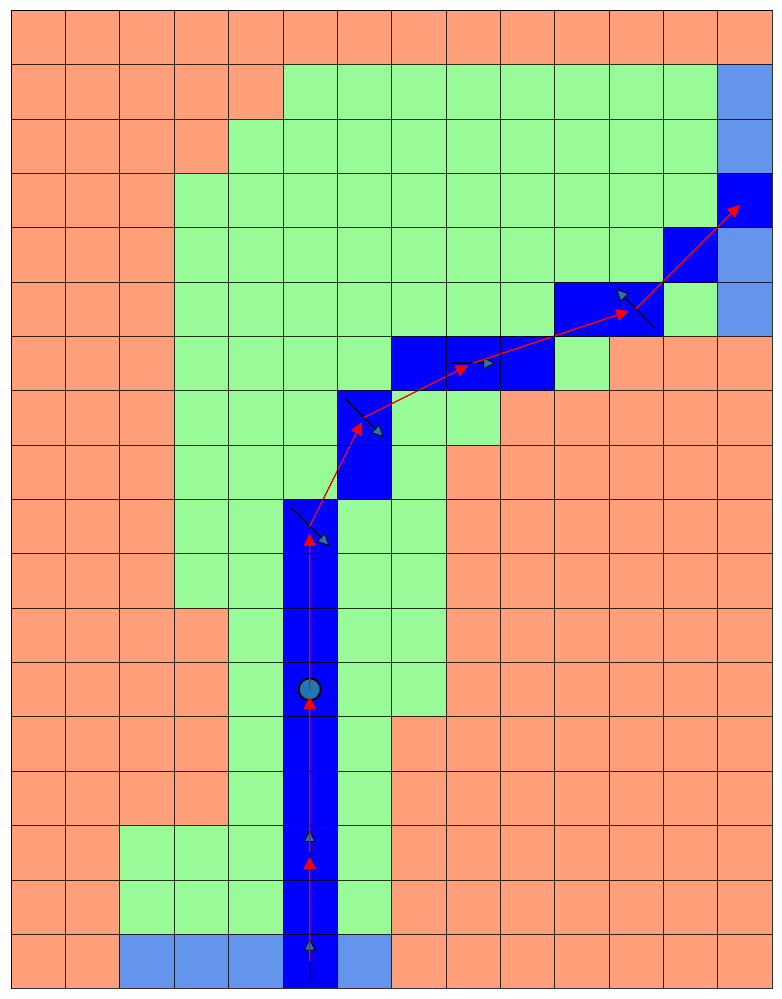

X Start is 6


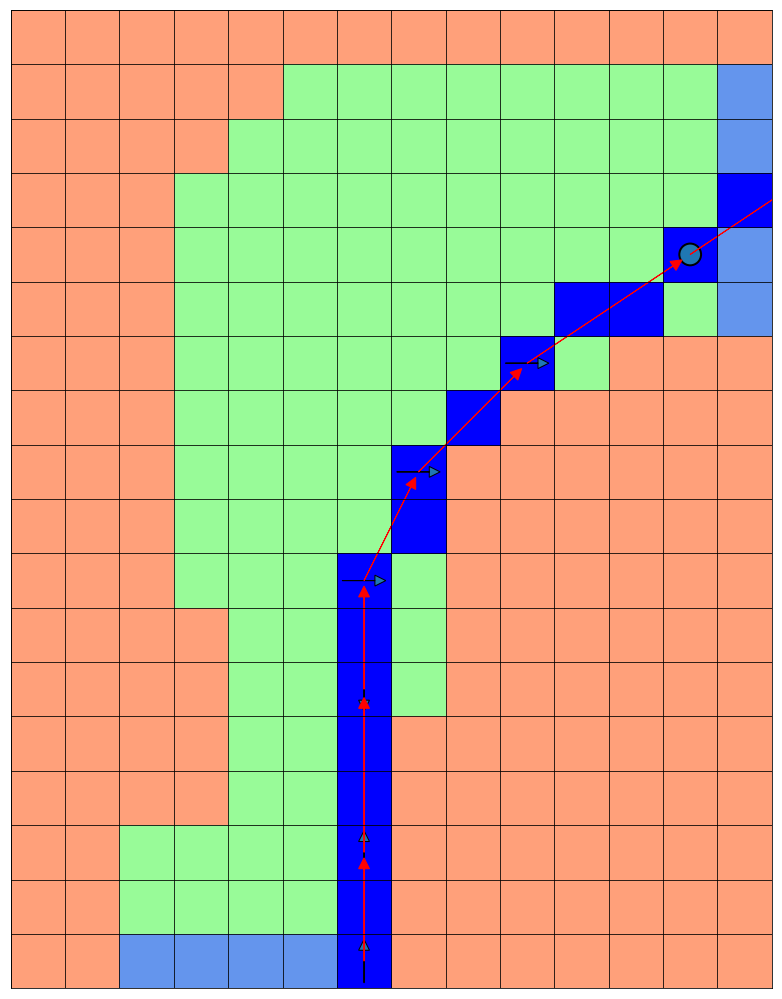

In [6]:
#Simulate episodes with diff starting by choosing policy that chooses the optimal Q value

for startXPosition in [2,3,4,5,6]:
    # create a racing environment
    racer = env()
    # reset the agent to one of the 4 starting cells at random
    # do this before each new episode
    racer.reset()
    # you can also manually set the agent position if you want to examine its behaviour there
    racer.setPosition(17,startXPosition)
    # create flag tracking whether the episode is over
    done = False

    # create lists to save the trajectory and the decisions of the agent
    actions = []
    moves = []
    velocities = []

    # these methods do what you would expect
    # v is an integer in [0, 35] representing a velocity
    # y, x are both integers, together, they represent the agents location
    v = racer.getVelocity()
    y, x = racer.getPosition()

    # simulate until the episode is over
    while not done:
        # which actions are possible at the current velocity?
        # the actions are integers in [0,8]
        possibleActions = racer.getAvailableActions()

        a = epsilonGreedy(Q,y,x,v,possibleActions,0) #Follow optimal action as given by Q values, epsilon = 0

        # save the action
        actions.append(a)
        # execute the action using the step function
        # y, x, v are new positions and velocities
        # done is the flag whether the episode is over
        # travel details exactly which cells the agent traveled through
        y, x, v, r, done, travel = racer.step(action = a)
        # save the velocities
        velocities.append(v)
        # save the cells that the agent most recently passed through
        # they are only needed for visualization
        moves.append(travel)

    # use the helper function to display how the episode went
    print(f'X Start is {startXPosition}')
    drawTrajectory(moves, actions, velocities)

### Task 22

Repeat the previous task, this time using Sarsa($\lambda$) to find the optimal policy $\pi^*(s,a)$. Again present your results as required above.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

In [7]:
#Hyperparameters
#These were determined after some experimentation 
noEpisodes = 20000
gamma = 0.9 #represents how much future rewards matters wrt to current rewards
epsilon = 0.3 #exploration vs exploitation
alpha = 0.2 #Weightage for new rewards vs old rewards
Lambda = 0.8 #represents how much future rewards matters wrt to current rewards

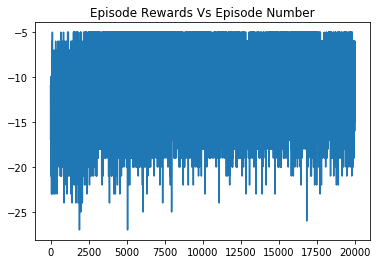

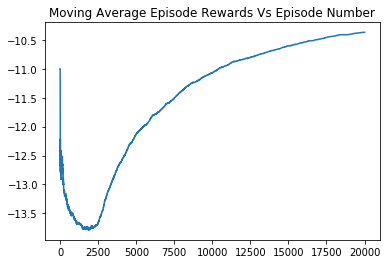

In [8]:
# Your solution goes here.

# Your solution goes here.
#SARSA(\lambda) Learning - Training

# get the required helper class and visualization function
from utils import env, drawTrajectory

#Initialize Q
Q = np.zeros(shape = (18,14,36,9)) #indices represent Q[y,x,velocity,action]
 

episodeRewards = [] #Store rewards of each episode
averageRewards = [0] #store avg reward obtained uptil that episode


for episode in range(noEpisodes):
    #print(f'Episode No {episode}')
    

    
    # create a racing environment
    racer = env()
    # reset the agent to one of the 4 starting cells at random
    # do this before each new episode
    racer.reset()
    # you can also manually set the agent position if you want to examine its behaviour there
    #racer.setPosition(17,6)
    # create flag tracking whether the episode is over
    done = False

    # create lists to save the trajectory and the decisions of the agent
    actions = []
    moves = []
    velocities = []
    episodeReward = 0
    step = 0

    #Set traces to 0 at the start of episode
    e = np.zeros(shape = (18,14,36,9))
    
    # these methods do what you would expect
    # v is an integer in [0, 35] representing a velocity
    # y, x are both integers, together, they represent the agents location
    v = racer.getVelocity()
    y, x = racer.getPosition()
    
    # which actions are possible at the current velocity?
    # the actions are integers in [0,8]
    
    possibleActions = racer.getAvailableActions()
    
    #Choose action in epsilon greedy manner
    a = epsilonGreedy(Q,y,x,v,possibleActions,epsilon)

    
    # simulate until the episode is over
    while not done:
        
        step+=1
        #print(f'Step No {step}')
        
        # save the action
        actions.append(a)
        # execute the action using the step function
        # y, x, v are new positions and velocities
        # done is the flag whether the episode is over
        # travel details exactly which cells the agent traveled through
        
        y_prime, x_prime, v_prime, r, done, travel = racer.step(action = a)
        
        possibleActions = racer.getAvailableActions()  
        a_prime = epsilonGreedy(Q,y_prime,x_prime,v_prime,possibleActions,epsilon)
        
        delta = (r + gamma*Q[y_prime,x_prime,v_prime,a_prime] - Q[y,x,v,a])
        e[y,x,v,a] += 1
        
        Q = Q + alpha * delta * e  #Q update in SARSA(\lambda)
        e = gamma * Lambda * e #trace update in SARSA(\lambda)
        
        
        episodeReward += r
        y, x, v = y_prime, x_prime, v_prime
        a = a_prime
        
        # save the velocities
        velocities.append(v)
        # save the cells that the agent most recently passed through
        # they are only needed for visualization
        moves.append(travel)

    episodeRewards.append(episodeReward)
    #Moving avg formula is new_mean = old_mean(1-1/n) + new_value/n 
    #where n is new length 
    averageRewards.append(averageRewards[-1] + (episodeReward-averageRewards[-1])/(episode+1)) 

plt.title("Episode Rewards Vs Episode Number")
plt.plot(range(noEpisodes),episodeRewards)
plt.show()

plt.title("Moving Average Episode Rewards Vs Episode Number")
plt.plot(range(noEpisodes),averageRewards[1:])
plt.show()

X Start is 2


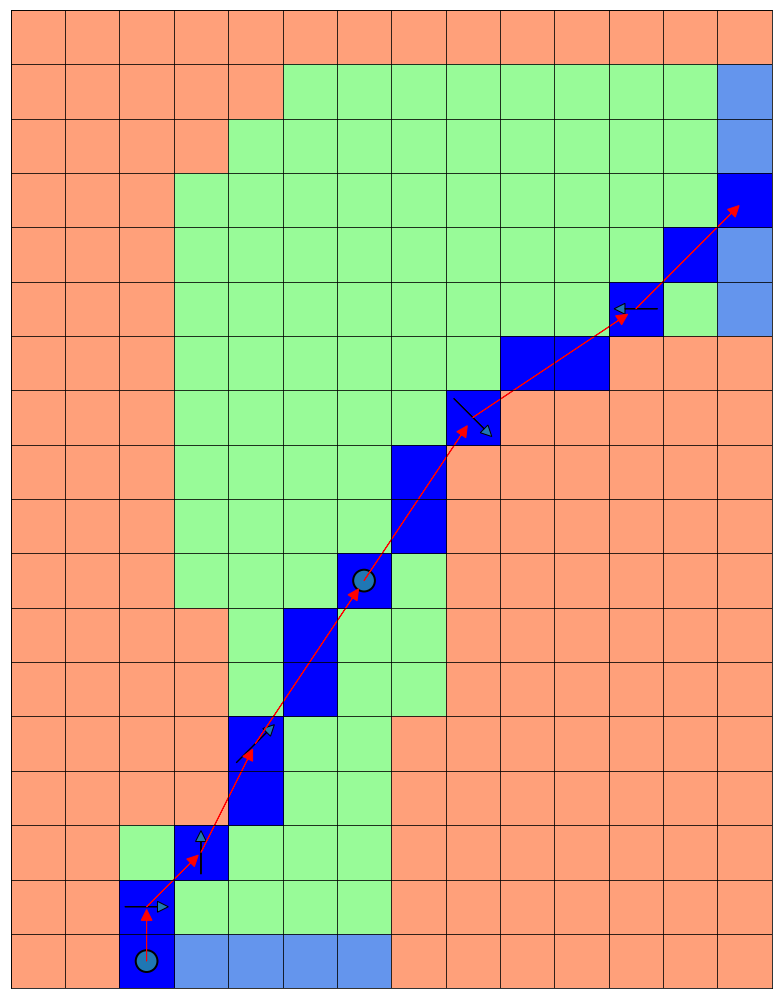

X Start is 3


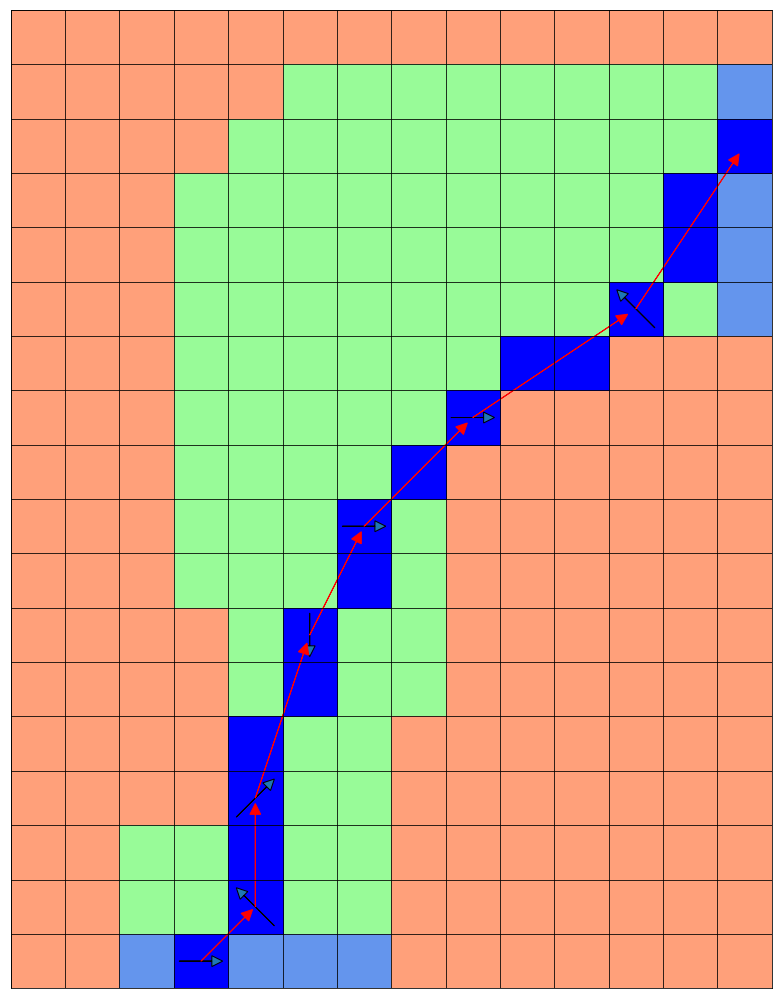

X Start is 4


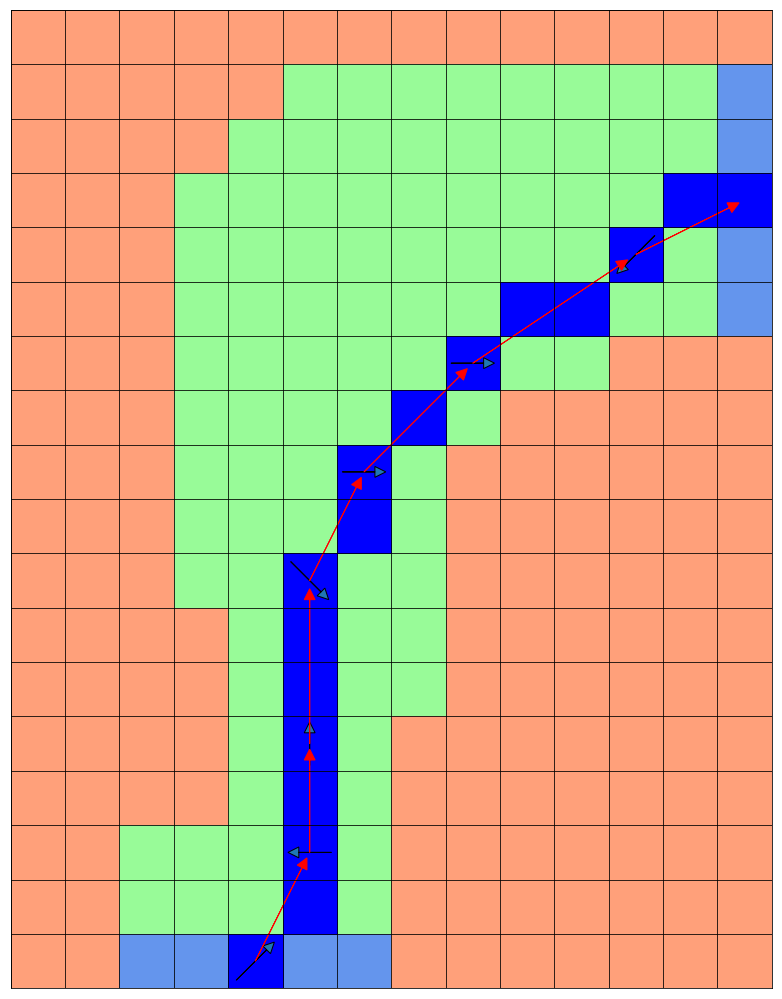

X Start is 5


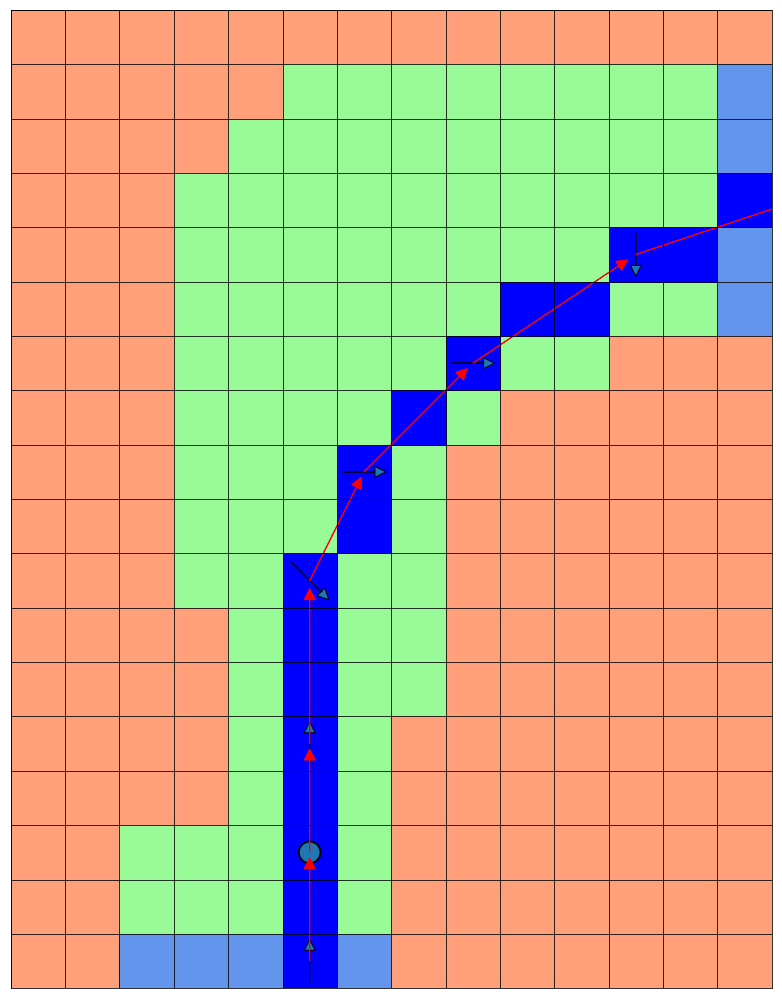

X Start is 6


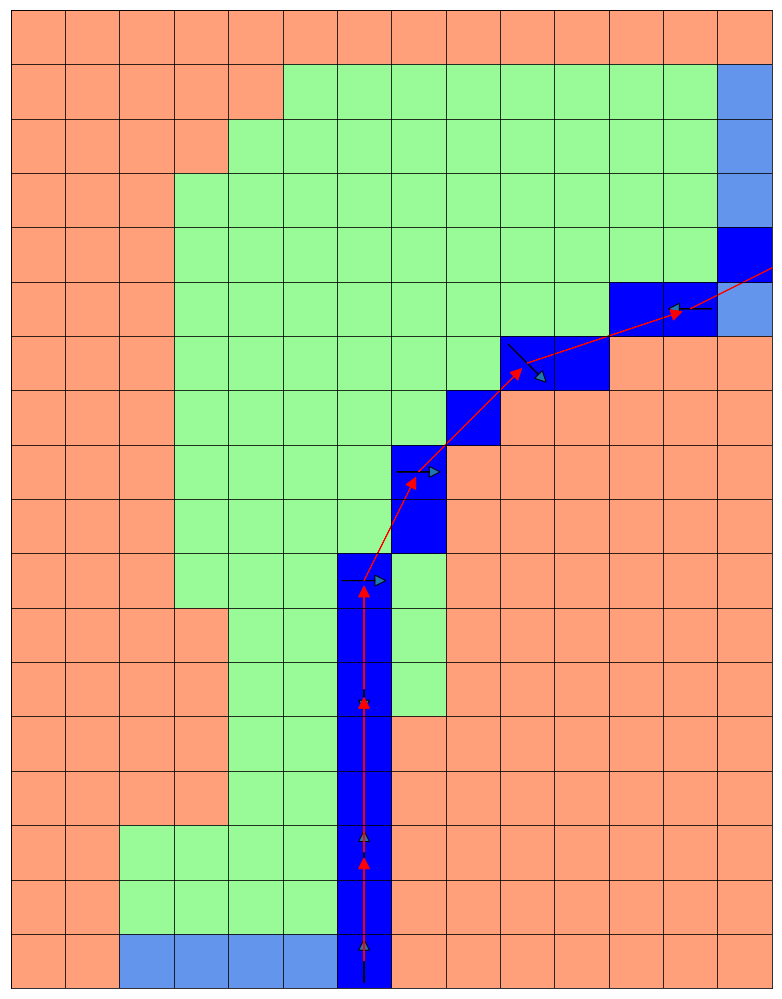

In [9]:
#Simulate episodes with diff starting by choosing policy that chooses the optimal Q value

for startXPosition in [2,3,4,5,6]:
    # create a racing environment
    racer = env()
    # reset the agent to one of the 4 starting cells at random
    # do this before each new episode
    racer.reset()
    # you can also manually set the agent position if you want to examine its behaviour there
    racer.setPosition(17,startXPosition)
    # create flag tracking whether the episode is over
    done = False

    # create lists to save the trajectory and the decisions of the agent
    actions = []
    moves = []
    velocities = []

    # these methods do what you would expect
    # v is an integer in [0, 35] representing a velocity
    # y, x are both integers, together, they represent the agents location
    v = racer.getVelocity()
    y, x = racer.getPosition()

    # simulate until the episode is over
    while not done:
        # which actions are possible at the current velocity?
        # the actions are integers in [0,8]
        possibleActions = racer.getAvailableActions()

        a = epsilonGreedy(Q,y,x,v,possibleActions,0) #Follow optimal action as given by Q values, epsilon = 0

        # save the action
        actions.append(a)
        # execute the action using the step function
        # y, x, v are new positions and velocities
        # done is the flag whether the episode is over
        # travel details exactly which cells the agent traveled through
        y, x, v, r, done, travel = racer.step(action = a)
        # save the velocities
        velocities.append(v)
        # save the cells that the agent most recently passed through
        # they are only needed for visualization
        moves.append(travel)

    # use the helper function to display how the episode went
    print(f'X Start is {startXPosition}')
    drawTrajectory(moves, actions, velocities)

We can see by looking at moving average graphs of the rewards that SARSA(lambda) converges faster than SARSA